In [40]:
import utils 
import importlib
import seaborn as sns
import pandas as pd
import os
import matplotlib.pyplot as plt

importlib.reload(utils)

<module 'utils' from 'c:\\PlatformIO\\Projects\\wheather_station\\streamlit_app\\utils.py'>

In [41]:
filepath = utils.get_battery_icon_filepath(20, './assets/')
os.path.isfile(filepath)

True

In [28]:
from astral import LocationInfo
from astral.sun import sun
from datetime import date

def get_sunrise_sunset(latitude=50.924503, longitude=4.112950):
    city = LocationInfo(
        name="Affligem",
        region="Belgium",
        timezone="Europe/Brussels",
        latitude=latitude,
        longitude=longitude
    )

    s = sun(city.observer, date=date.today(), tzinfo=city.timezone)

    sunrise_str = s["sunrise"].strftime("%H:%M") + " AM"
    sunset_str = s["sunset"].strftime("%H:%M") + " PM"

    return sunrise_str, sunset_str

sunrise, sunset = get_sunrise_sunset()
# st.write(f"**Sunrise:** {sunrise}  |  **Sunset:** {sunset}")

In [32]:

debug = 0
gid = '2078525972'
google_sheet_df = utils.get_google_sheet_df(sheet_gid=gid)

if debug == True:
    st.write("Available columns in Sheet:", google_sheet_df.columns.tolist()) # Add this line

df = utils.tidy_google_sheet_df(google_sheet_df,decoded_payload_data_col_name_list=[])
time_window_df = df.tail(50)

https://docs.google.com/spreadsheets/d/1zPwrfEDDBZVqb3mwbBCHdeCaGAHnUresvGlHDXuD_qI/export?format=csv&gid=2078525972


In [34]:
df.to_csv('data.csv', index=False)

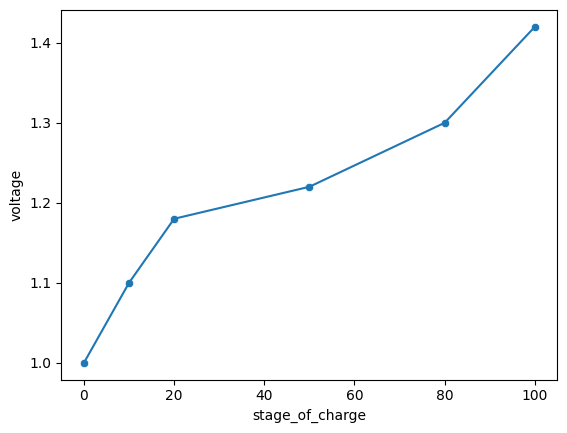

In [5]:
%matplotlib inline
sparse_discharge_df = pd.read_csv('NiM_sparse_discharge_curve.csv')
sns.scatterplot(data=sparse_discharge_df, x='stage_of_charge', y='voltage')
sns.lineplot(data=sparse_discharge_df, x='stage_of_charge', y='voltage')
plt.show()

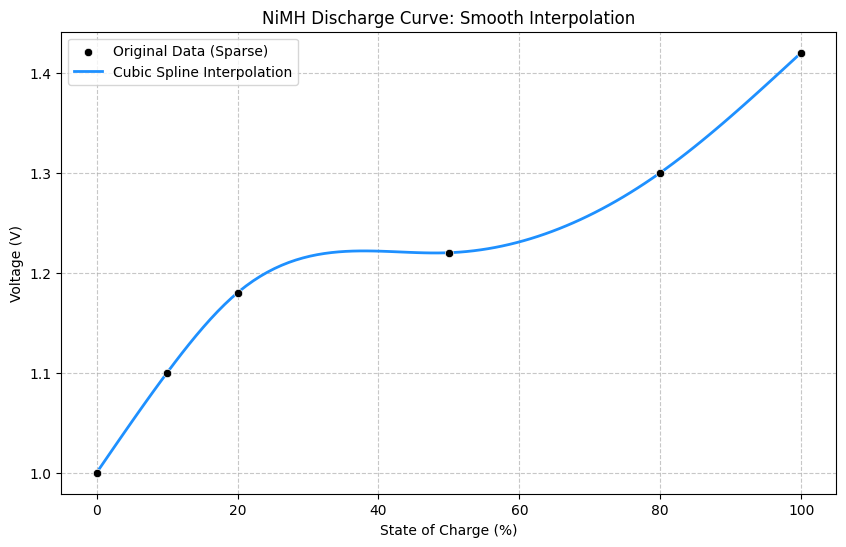

Estimated voltage at 50% SoC: 1.220V


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import CubicSpline

# 1. Load data
sparse_discharge_df = pd.read_csv('NiM_sparse_discharge_curve.csv')

# Ensure data is sorted by State of Charge for interpolation to work correctly
df = sparse_discharge_df.sort_values('stage_of_charge')
x = df['stage_of_charge']
y = df['voltage']

# 2. Create the Interpolation Function
# 'bc_type' can be adjusted, but 'natural' is a good default for battery curves
cs = CubicSpline(x, y, bc_type='natural')

# 3. Generate a smooth range of X values (e.g., 100 points between min and max SoC)
x_smooth = np.linspace(x.min(), x.max(), 100)
y_smooth = cs(x_smooth)

# 4. Visualization
plt.figure(figsize=(10, 6))

# Plot the original sparse points
sns.scatterplot(x=x, y=y, color='black', label='Original Data (Sparse)', zorder=5)

# Plot the smooth interpolated line
plt.plot(x_smooth, y_smooth, color='dodgerblue', linewidth=2, label='Cubic Spline Interpolation')

plt.title('NiMH Discharge Curve: Smooth Interpolation')
plt.xlabel('State of Charge (%)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Example Usage: Estimate voltage at 50% charge
print(f"Estimated voltage at 50% SoC: {cs(50):.3f}V")

In [9]:
pd.DataFrame({
    'stage_of_charge': x_smooth,
    'voltage': y_smooth
}).to_csv('NiM_smooth_discharge_curve.csv', index=False)

In [27]:
def calculate_stage_of_charge(discharge_curve, num_batteries, readout_voltage):
    # 1. Calculate voltage per individual cell
    voltage_per_cell = readout_voltage / num_batteries
    
    # 2. Extract columns for readability
    # Ensure they are sorted by voltage for the interpolation to work
    df_sorted = discharge_curve.sort_values('voltage')
    voltages = df_sorted['voltage'].values
    soc_values = df_sorted['stage_of_charge'].values
    
    # 3. Perform linear interpolation
    # np.interp(x_to_find, x_values, y_values)
    soc = np.interp(voltage_per_cell, voltages, soc_values)
    
    return int(soc)

calculate_stage_of_charge(smooth_discharge_df, 3, 3.7)



61

In [14]:
import utils 
importlib.reload(utils)
gid = '2078525972'
google_sheet_df = utils.get_google_sheet_df(sheet_gid=gid)
df = utils.tidy_google_sheet_df(google_sheet_df,decoded_payload_data_col_name_list=[])
df

https://docs.google.com/spreadsheets/d/1zPwrfEDDBZVqb3mwbBCHdeCaGAHnUresvGlHDXuD_qI/export?format=csv&gid=2078525972


,uplink_message_frm_payload,received_at,uplink_message_rx_metadata_0_rssi,uplink_message_rx_metadata_0_snr,uplink_message_rx_metadata_0_channel_rssi,humidity_avg,humidity_min,humidity_max,temp_avg,temp_min,temp_max,0,received_at_td_seconds,received_at_td_minutes,seconds_since_now
0,AAAcDQAAG/gAABxC,2026-01-04 10:43:58+00:00,-72,10.2,-72,0.00,71.81,0.00,71.60,0.00,72.34,NaN,NaN,NaN,120906.930106
1,AAAcAQAAG9IAABww,2026-01-04 10:44:10+00:00,-72,14.2,-72,0.00,71.69,0.00,71.22,0.00,72.16,NaN,12.0,0.200000,120894.930106
2,AAAcMgAAHCQAABxA,2026-01-04 10:44:22+00:00,-67,11.0,-67,0.00,72.18,0.00,72.04,0.00,72.32,NaN,12.0,0.200000,120882.930106
3,AAAcJgAAHBEAABwt,2026-01-04 10:44:34+00:00,-66,14.0,-66,0.00,72.06,0.00,71.85,0.00,72.13,NaN,12.0,0.200000,120870.930106
4,AAAbtAAAG5QAABvd,2026-01-04 10:44:46+00:00,-69,12.0,-69,0.00,70.92,0.00,70.60,0.00,71.33,NaN,12.0,0.200000,120858.930106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9204,E6YTohOqBccFxQXJ,2026-01-05 20:17:59+00:00,-71,14.0,-71,50.30,50.26,50.34,14.79,14.77,14.81,NaN,12.0,0.200000,65.930106
9205,E6gTphOqBccFxAXJ,2026-01-05 20:18:11+00:00,-73,14.0,-73,50.32,50.30,50.34,14.79,14.76,14.81,NaN,12.0,0.200000,53.930106
9206,E6sTpxOwBcgFxgXK,2026-01-05 20:18:23+00:00,-72,14.0,-72,50.35,50.31,50.40,14.80,14.78,14.82,NaN,12.0,0.200000,41.930106
9207,E60TqROxBccFxQXK,2026-01-05 20:18:36+00:00,-71,14.0,-71,50.37,50.33,50.41,14.79,14.77,14.82,NaN,13.0,0.216667,28.930106


In [28]:
df = utils.get_google_sheet_df(sheet_gid='2078525972')

https://docs.google.com/spreadsheets/d/1zPwrfEDDBZVqb3mwbBCHdeCaGAHnUresvGlHDXuD_qI/export?format=csv&gid=2078525972


In [31]:
decoded_cols = df['uplink_message_frm_payload'].apply(utils.decode_heltec_payload).apply(pd.Series)
decoded_cols

,humidity_avg,humidity_min,humidity_max,temp_avg,temp_min,temp_max,0
0,0.00,71.81,0.00,71.60,0.00,72.34,NaN
1,0.00,71.69,0.00,71.22,0.00,72.16,NaN
2,0.00,72.18,0.00,72.04,0.00,72.32,NaN
3,0.00,72.06,0.00,71.85,0.00,72.13,NaN
4,0.00,70.92,0.00,70.60,0.00,71.33,NaN
...,...,...,...,...,...,...,...
9037,50.08,50.04,50.12,14.87,14.86,14.88,NaN
9038,50.07,50.05,50.10,14.88,14.87,14.90,NaN
9039,50.06,50.03,50.10,14.86,14.84,14.88,NaN
9040,50.09,50.07,50.12,14.86,14.84,14.88,NaN


In [25]:
importlib.reload(utils)
df = pd.concat([df, decoded_cols], axis=1)
df

,received_at,uplink_message_session_key_id,uplink_message_f_port,uplink_message_f_cnt,uplink_message_frm_payload,uplink_message_rx_metadata_0_gateway_ids_gateway_id,uplink_message_rx_metadata_0_gateway_ids_eui,uplink_message_rx_metadata_0_timestamp,uplink_message_rx_metadata_0_rssi,uplink_message_rx_metadata_0_channel_rssi,...,uplink_message_version_ids_firmware_version,uplink_message_version_ids_band_id,uplink_message_network_ids_net_id,uplink_message_network_ids_ns_id,uplink_message_network_ids_tenant_id,uplink_message_network_ids_cluster_id,uplink_message_network_ids_cluster_address,uplink_message_frm_payload,uplink_message_frm_payload,uplink_message_frm_payload
0,2026-01-04T10:43:58.055662952Z,AZuISzUQejYm6JtnLGCiFQ==,2,427.0,AAAcDQAAG/gAABxC,abijdstraat-lorawan-gateway,2CF7F1107340004E,305834968,-72,-72,...,1,EU_863_870,13,EC656E0000000181,ttn,eu1,eu1.cloud.thethings.network,"{'humidity_avg': 0.0, 'humidity_min': 71.81, '...","{'humidity_avg': 0.0, 'humidity_min': 71.81, '...","{'humidity_avg': 0.0, 'humidity_min': 71.81, '..."
1,2026-01-04T10:44:10.208490506Z,AZuISzUQejYm6JtnLGCiFQ==,2,428.0,AAAcAQAAG9IAABww,abijdstraat-lorawan-gateway,2CF7F1107340004E,317979961,-72,-72,...,1,EU_863_870,13,EC656E0000000181,ttn,eu1,eu1.cloud.thethings.network,"{'humidity_avg': 0.0, 'humidity_min': 71.69, '...","{'humidity_avg': 0.0, 'humidity_min': 71.69, '...","{'humidity_avg': 0.0, 'humidity_min': 71.69, '..."
2,2026-01-04T10:44:22.350497616Z,AZuISzUQejYm6JtnLGCiFQ==,2,429.0,AAAcMgAAHCQAABxA,abijdstraat-lorawan-gateway,2CF7F1107340004E,330124943,-67,-67,...,1,EU_863_870,13,EC656E0000000181,ttn,eu1,eu1.cloud.thethings.network,"{'humidity_avg': 0.0, 'humidity_min': 72.18, '...","{'humidity_avg': 0.0, 'humidity_min': 72.18, '...","{'humidity_avg': 0.0, 'humidity_min': 72.18, '..."
3,2026-01-04T10:44:34.497026097Z,AZuISzUQejYm6JtnLGCiFQ==,2,430.0,AAAcJgAAHBEAABwt,abijdstraat-lorawan-gateway,2CF7F1107340004E,342269955,-66,-66,...,1,EU_863_870,13,EC656E0000000181,ttn,eu1,eu1.cloud.thethings.network,"{'humidity_avg': 0.0, 'humidity_min': 72.06, '...","{'humidity_avg': 0.0, 'humidity_min': 72.06, '...","{'humidity_avg': 0.0, 'humidity_min': 72.06, '..."
4,2026-01-04T10:44:46.641908056Z,AZuISzUQejYm6JtnLGCiFQ==,2,431.0,AAAbtAAAG5QAABvd,abijdstraat-lorawan-gateway,2CF7F1107340004E,354414961,-69,-69,...,1,EU_863_870,13,EC656E0000000181,ttn,eu1,eu1.cloud.thethings.network,"{'humidity_avg': 0.0, 'humidity_min': 70.92, '...","{'humidity_avg': 0.0, 'humidity_min': 70.92, '...","{'humidity_avg': 0.0, 'humidity_min': 70.92, '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8982,2026-01-05T19:32:52.454901175Z,AZuKCMvOHM4Ii//PhbH8zA==,2,7699.0,E0oTSBNNBeoF6AXs,abijdstraat-lorawan-gateway,2CF7F1107340004E,2476086196,-73,-73,...,1,EU_863_870,13,EC656E0000000181,ttn,eu1,eu1.cloud.thethings.network,"{'humidity_avg': 49.38, 'humidity_min': 49.36,...","{'humidity_avg': 49.38, 'humidity_min': 49.36,...","{'humidity_avg': 49.38, 'humidity_min': 49.36,..."
8983,2026-01-05T19:33:04.609837122Z,AZuKCMvOHM4Ii//PhbH8zA==,2,7700.0,E08TSxNRBegF5wXq,abijdstraat-lorawan-gateway,2CF7F1107340004E,2488230181,-72,-72,...,1,EU_863_870,13,EC656E0000000181,ttn,eu1,eu1.cloud.thethings.network,"{'humidity_avg': 49.43, 'humidity_min': 49.39,...","{'humidity_avg': 49.43, 'humidity_min': 49.39,...","{'humidity_avg': 49.43, 'humidity_min': 49.39,..."
8984,2026-01-05T19:33:16.734191568Z,AZuKCMvOHM4Ii//PhbH8zA==,2,7701.0,E1ITUBNTBecF5QXo,abijdstraat-lorawan-gateway,2CF7F1107340004E,2500374172,-71,-71,...,1,EU_863_870,13,EC656E0000000181,ttn,eu1,eu1.cloud.thethings.network,"{'humidity_avg': 49.46, 'humidity_min': 49.44,...","{'humidity_avg': 49.46, 'humidity_min': 49.44,...","{'humidity_avg': 49.46, 'humidity_min': 49.44,..."
8985,2026-01-05T19:33:28.892467695Z,AZuKCMvOHM4Ii//PhbH8zA==,2,7702.0,E1QTTxNXBeYF5AXn,abijdstraat-lorawan-gateway,2CF7F1107340004E,2512518145,-73,-73,...,1,EU_863_870,13,EC656E0000000181,ttn,eu1,eu1.cloud.thethings.network

In [4]:
google_sheet_df = utils.get_google_sheet_df(sheet_id="2078525972")


HTTPError: HTTP Error 404: Not Found

In [2]:
google_sheet_df = utils.get_google_sheet_df()
df = utils.tidy_google_sheet_df(google_sheet_df)
last_measurement_string =  utils.get_last_measurement_string(df)
time_window_df = df.tail(50)

KeyboardInterrupt: 

In [5]:
google_sheet_df = utils.get_google_sheet_df()
df = utils.tidy_google_sheet_df(google_sheet_df)
last_measurement_string =  utils.get_last_measurement_string(df)
time_window_df = df.tail(50)

df

KeyboardInterrupt: 

<Axes: xlabel='received_at', ylabel='uplink_message_rx_metadata_0_channel_rssi'>

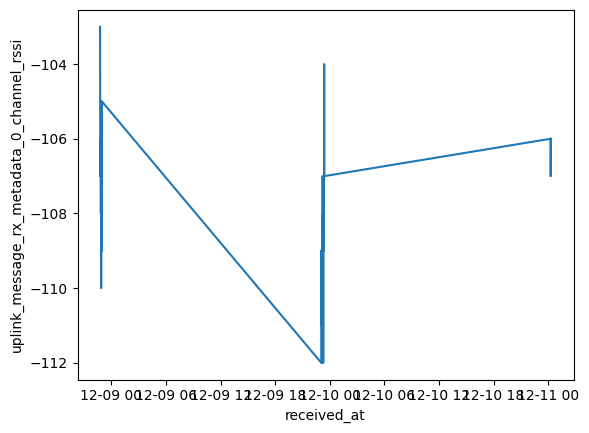

In [21]:
sns.lineplot(data=df.tail(40), x='received_at', y='uplink_message_rx_metadata_0_channel_rssi')
